In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [85]:
traindf = pd.read_csv('data/fashion-mnist_train.csv')
testdf = pd.read_csv('data/fashion-mnist_test.csv')

In [86]:
traindf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
print(traindf.shape)

(60000, 785)


In [88]:
traindata = traindf.values
testdata = testdf.values

In [89]:
Xtrain = traindata[:traindata.shape[0]//2,1:]
Ytrain = traindata[:traindata.shape[0]//2,0]
Xtest = testdata[:testdata.shape[0]//10,1:]
Ytest = testdata[:testdata.shape[0]//10,0]

In [90]:
onehot_encoder1 = OneHotEncoder(sparse=False)
onehot_encoder2 = OneHotEncoder(sparse=False)

Ytrain_onehot = onehot_encoder1.fit_transform(Ytrain.reshape(-1, 1))
Ytest_onehot = onehot_encoder2.fit_transform(Ytest.reshape(-1, 1))

In [91]:
Ytrain_onehot.shape, Ytest_onehot.shape

((30000, 10), (1000, 10))

In [92]:
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(30000, 784) (30000,) (1000, 784) (1000,)


In [93]:
Xtrain = Xtrain.reshape(-1, 28, 28,1)
Xtest = Xtest.reshape(-1, 28, 28, 1)

In [94]:
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(30000, 28, 28, 1) (30000,) (1000, 28, 28, 1) (1000,)


In [103]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

In [123]:
input_frame = Input(shape=Xtrain[0].shape)
x = Conv2D(8, (5, 5), strides=(2,2), padding="same", activation='relu')(input_frame)
x = Conv2D(16, (3, 3), strides=(2,2), padding="same", activation='relu')(x)
x = Conv2D(32, (3, 3), strides=(2,2), padding="same", activation='relu')(x)
x = Conv2D(32, (3, 3), strides=(2,2), padding="same", activation='relu')(x)
x = AveragePooling2D((2,2))(x)
x = Flatten()(x)
output  = Dense(10, activation='softmax')(x)

model = Model(input_frame, output)


In [124]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
class MyCallback(Callback):
    def __init__(self, Xtest, Ytest):
        self.Xtest = Xtest
        self.Ytest = Ytest
        self.test_accs = []

    def on_epoch_end(self, epoch, logs={}):
        loss, acc = self.model.evaluate(self.Xtest, self.Ytest, verbose=0)
        self.test_accs.append(acc)
        print('- test_loss: {} - test_accuracy: {}\n'.format(loss, acc))

In [126]:
myCallback = MyCallback(Xtest, Ytest_onehot)

In [127]:
history = model.fit(Xtrain, Ytrain_onehot, batch_size=32, epochs=10, verbose=1, callbacks=[myCallback])

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.6981 - accuracy: 0.7628
- test_loss: 0.4559757113456726 - test_accuracy: 0.847000002861023

Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.4354 - accuracy: 0.8463
- test_loss: 0.400118350982666 - test_accuracy: 0.8560000061988831

Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3819 - accuracy: 0.8618
- test_loss: 0.35542604327201843 - test_accuracy: 0.8740000128746033

Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3495 - accuracy: 0.8731
- test_loss: 0.35944586992263794 - test_accuracy: 0.8619999885559082

Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3259 - accuracy: 0.8807
- test_loss: 0.3799094557762146 - test_accuracy: 0.8600000143051147

Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.3054 - accuracy: 0.8876
- test_loss: 0.3384682536125183 - test_accuracy: 0.8730

In [128]:
import matplotlib.pyplot as plt

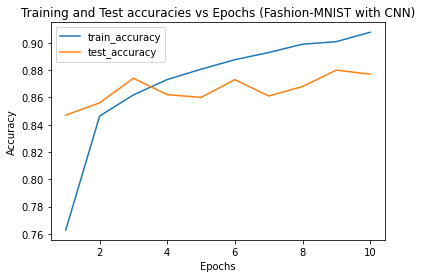

In [129]:
epochs = [i for i in range(1,11)]
plt.figure()
plt.title("Training and Test accuracies vs Epochs (Fashion-MNIST with CNN)")
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,myCallback.test_accs)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend(["train_accuracy", "test_accuracy"])
plt.show()